<a href="https://colab.research.google.com/github/barcygan/python/blob/master/kalkulator_wagi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Weight measuerement data based on Google Sheet (COLAB)**

What for? 
1.   Saving history of Your weight measurement
2.   Checking history of Your weight measurement
3.   Data visualisation for Your progress (or recourse :(( )
[link text](https://)


In [93]:
#Asking for date
from dateutil import parser
l=True
while l:
  decision = input('Czy pomiar był dzisiaj? Y - Yes, N - NO  ')
  if decision == 'Y':
    data_dzisiaj = datetime.today().strftime('%Y-%m-%d')
    l=False



  else:
      try:
          data_dzisiaj = parser.parse(input("Enter date: " ))
      
      except ValueError:
          print("To nie jest data.")
          continue
      else:
        #Weight was successfully parsed!

          break


Czy pomiar był dzisiaj? Y - Yes, N - NO  y
Enter date: y
To nie jest data.
Czy pomiar był dzisiaj? Y - Yes, N - NO  Y


In [90]:
from dateutil import parser


###########################################################################
#Getting current weight measurement

while True:
    try:
        waga = float(input("Please enter your weight: "))
    except ValueError:
        print("To nie jest liczba.")
        continue
    else:
        #Weight was successfully parsed!
        break


print(f'Twoja dzisiejsza waga to : {waga} kg')

#########################################################################







Please enter your weight: 54
Twoja dzisiejsza waga to : 54.0 kg


In [94]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Connecting to Google Sheets

# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
path='/content/drive/My Drive/Colab Notebooks/bigquery-262509-fbf7094d4de6.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)

# Find a workbook by name and open the first sheet
sheet = client.open("waga").sheet1


#Looking for last free row to fill up with datas
sheet_size = len(sheet.col_values(1))

#Getting current date
########### TO DO : asking and checking if measurement time == current date############


#Add current weight and weight measurement time to Google Sheet

append_date =  sheet.update_cell(sheet_size+1, 2, data_dzisiaj)
append_weight =  sheet.update_cell(sheet_size+1, 1, str(waga))


print(data_dzisiaj)


2020-07-16


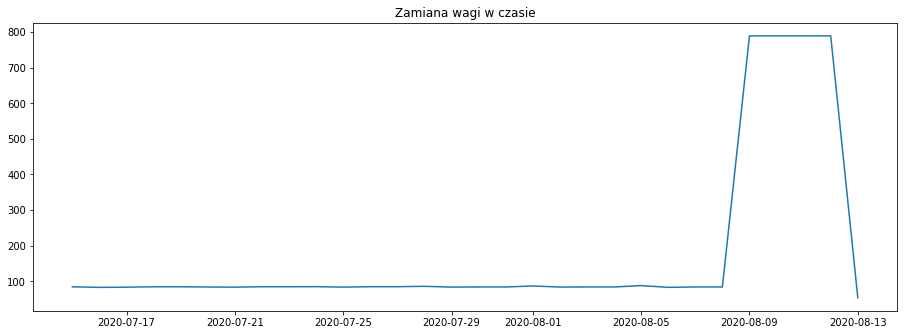

In [96]:
#Odczytanie arkusza w pandas
%matplotlib inline

data = sheet.get_all_values()
headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)

#Przetworzenie dataseries do int oraz datetime
df.Waga = pd.to_numeric(df.Waga, errors='coerce')
df.Data = pd.to_datetime(df.Data)

# Creating statistics (plots and others)

import matplotlib.pyplot as plt

fig = plt.figure()
axes1 = fig.add_axes([1,1,2,1])

axes1.plot(df['Data'],df['Waga'])
axes1.set_title('Zamiana wagi w czasie')

fig.savefig('wykres1.png',dpi=100)
#plt.xticks(rotation='vertical')